# Carga de librerias

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

# Carga de datos

Debido a que se trabajara con grandes cantidades de data se definio cada uno de los tipos de datos de los datos pasados por archivo para no sobrecargar al parser de los archivos csv y ahorrar espacio de memoria al conocer mejor que cantidad de memoria se necesitara.

In [70]:
data_types_clicks = {'advertiser_id':'category' , 'action_id':'category' , 'source_id':'category', 'created':str,\
                     'countrycode':'category','latitude':np.float16, 'longitude':np.float16, 'wifi_conection':bool,\
                     'carrier_id':np.float32, 'trans_id':str, 'os_minor':'category', 'agent_devise':'category', \
                     'os_major':'category', 'specs_brnad':'category', 'timeToClick': np.float16, 'touchX':np.float16, \
                     'touchY':np.float16, 'ref_type':np.int64, 'ref_hash':np.int64}

data_types_installs = { "created" : str, "application_id" : np.uint8, "ref_type" : 'category',"click_hash" : 'category',\
                       "attributed" : bool, "implicit": bool, "device_countrycode" : 'category',"device_brand" : 'category',\
                       "device_model" : 'category', "session_user_agent" : 'category', "user_agent": 'category',"event_uuid":\
                       'category', "kind" : str, "wifi" : 'category', "trans_id" : str, "ip_address" : 'category', \
                       "device_language" : 'category'}

data_types_events = {'ref_type':'category', 'event_id' : 'category', 'ref_hash': 'category', 'application_id':'category',\
                     'attributed':bool, 'device_os':'category', 'device_os_version':'category', 'device_brand':'category',\
                     'device_model':'category','device_city':'category', 'session_user_agent':'category', 'trans_id':\
                     'category', 'user_agent':'category', 'event_uuid':'category','carrier':'category','kind':'category',\
                     'wifi':"category",'connection_type':'category','ip_address':'category','device_language':'category',\
                     'device_countrycode':'category'}

data_types_auctions = { "auction_type_id" : 'category', "country" : 'category', "date" : str, "device_id" : 'category', \
                      "platform" : 'category', "ref_type_id" : 'category', "source_id" : 'category'}

In [71]:
clicks = pd.read_csv("/home/anichu/Downloads/tp1/clicks.csv", dtype = data_types_clicks) 
installs =  pd.read_csv("/home/anichu/Downloads/tp1/installs.csv", dtype = data_types_installs)
events = pd.read_csv("/home/anichu/Downloads/tp1/events.csv", dtype = data_types_events)
auctions = pd.read_csv("/home/anichu/Downloads/tp1/auctions.csv", dtype = data_types_auctions)

# Analisis preliminar

In [72]:
# Cambiamos el formato de aquellos datos que contengan fecha a datetime para luego trabajar mas comodamente.

clicks['created'] = pd.to_datetime(clicks['created'])
installs['created'] = pd.to_datetime(installs['created'])
auctions['date'] = pd.to_datetime(auctions['date'])

## Clicks

In [73]:
clicks.head()

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,NaN,4,2019-03-06 22:42:12.755000+00:00,6333597102633388268,1.206055,1.070312,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137412412545e+18,NaN,3.072849339937028e+18,2733035977666442898,NaN,1.563477,0.904785,0.078003,1891515180541284343,1904083516767779093
1,0,NaN,0,2019-03-08 10:24:30.641000+00:00,6333597102633388268,1.218750,1.071289,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219449024123e+18,NaN,1.77408510258909e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,NaN,0,2019-03-08 15:24:16.069000+00:00,6333597102633388268,1.206055,1.070312,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.97565607170903e+18,NaN,3.072849339937028e+18,392184377613098015,NaN,NaN,0.945801,0.472900,1891515180541284343,6958163894863846647
3,2,NaN,3,2019-03-06 03:08:51.543000+00:00,6333597102633388268,1.206055,1.070312,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,6.768137412412545e+18,NaN,3.072849339937028e+18,2733035977666442898,NaN,19.015625,0.035004,0.430908,1891515180541284343,4368617728156436525
4,2,NaN,3,2019-03-06 03:32:55.570000+00:00,6333597102633388268,1.206055,1.070312,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,6.768137412412545e+18,NaN,3.072849339937028e+18,2733035977666442898,NaN,28.109375,0.053986,0.423096,1891515180541284343,4368617728156436525


In [74]:
clicks.describe(include='all')

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
count,26351,0.0,26351,26351,2.635100e+04,26351.000000,26351.000000,26351,26340.000000,26351,26339,3.243000e+03,26339,2.635100e+04,6235.000000,2.297700e+04,23011.000000,23011.000000,2.635100e+04,2.635100e+04
unique,7,0.0,11,26347,NaN,NaN,NaN,1,NaN,26351,28,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,3,NaN,0,2019-03-10 05:02:10.703000+00:00,NaN,NaN,NaN,False,NaN,M2Flj35pZI10q2ZGeHjcWAskzUgSitw,3.3786399484966047e+18,NaN,3.072849339937028e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,26263,NaN,17009,2,NaN,NaN,NaN,26351,NaN,1,6922,NaN,7430,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,2019-03-05 01:17:30.663000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2019-03-13 23:59:59.298000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,6.333597e+18,1.207031,1.070312,NaN,7.743812,NaN,NaN,4.171028e+18,NaN,1.299055e+18,1.482277,inf,0.639160,1.478516,1.888100e+18,4.611581e+18
std,NaN,NaN,NaN,NaN,2.089000e+05,0.004375,0.001891,NaN,7.016973,NaN,NaN,2.460496e+18,NaN,1.149672e+18,1.583764,inf,0.302002,2.623047,1.721252e+17,2.673175e+18
min,NaN,NaN,NaN,NaN,6.333597e+18,1.205078,1.058594,NaN,0.000000,NaN,NaN,4.513618e+16,NaN,3.921844e+17,0.000000,1.699829e-02,0.000000,0.000000,1.494519e+18,9.286192e+14
25%,NaN,NaN,NaN,NaN,6.333597e+18,1.206055,1.070312,NaN,3.000000,NaN,NaN,1.975183e+18,NaN,3.921844e+17,0.000000,2.914062e+00,0.426025,0.182983,1.891515e+18,2.273798e+18


In [75]:
# Notamos todos los valores de action_id nos nulos por lo que quitamos tal columna
del clicks['action_id']

In [76]:
#Notamos que todos los clicks se realizaron sin wi-fi
clicks['wifi_connection'].value_counts()

False    26351
Name: wifi_connection, dtype: int64

In [77]:
# Notamos que todos los clicks realiados se realizaron sin wi-fi, luego borramos tal columna
wifi_connection = False
del clicks['wifi_connection']

In [78]:
# Notamos que todos los clicks se realizaron en el mismo pais
clicks['country_code'].value_counts()

6333597102633388268    26351
Name: country_code, dtype: int64

In [79]:
# Luego nos guardamos el dato del pais y eliminamos tal columna
country_code = 6333597102633388268
del clicks['country_code']

In [80]:
clicks.head()

,advertiser_id,source_id,created,latitude,longitude,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,4,2019-03-06 22:42:12.755000+00:00,1.206055,1.070312,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137412412545e+18,NaN,3.072849339937028e+18,2733035977666442898,NaN,1.563477,0.904785,0.078003,1891515180541284343,1904083516767779093
1,0,0,2019-03-08 10:24:30.641000+00:00,1.218750,1.071289,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219449024123e+18,NaN,1.77408510258909e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,0,2019-03-08 15:24:16.069000+00:00,1.206055,1.070312,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.97565607170903e+18,NaN,3.072849339937028e+18,392184377613098015,NaN,NaN,0.945801,0.472900,1891515180541284343,6958163894863846647
3,2,3,2019-03-06 03:08:51.543000+00:00,1.206055,1.070312,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,6.768137412412545e+18,NaN,3.072849339937028e+18,2733035977666442898,NaN,19.015625,0.035004,0.430908,1891515180541284343,4368617728156436525
4,2,3,2019-03-06 03:32:55.570000+00:00,1.206055,1.070312,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,6.768137412412545e+18,NaN,3.072849339937028e+18,2733035977666442898,NaN,28.109375,0.053986,0.423096,1891515180541284343,4368617728156436525


## Installs

In [81]:
installs.head()

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,NaN,False,False,6333597102633388268,3.083058605577787e+17,4.4452523127597215e+18,NaN,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,NaN,False,False,6333597102633388268,3.083058605577787e+17,4.4452523127597215e+18,NaN,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,NaN,False,True,6333597102633388268,5.1379920467642125e+17,6.026543327929208e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,NaN,4636407223847323867,3.3013777759776993e+18
3,2019-03-13 04:20:57.698,0,1891515180541284343,7953318831018100268,NaN,False,False,6333597102633388268,5.1379920467642125e+17,6.026543327929208e+18,NaN,NaN,NaN,NaN,NaN,NaN,4636407223847323867,NaN
4,2019-03-10 22:24:56.684,0,1891515180541284343,8355110941557237501,NaN,False,True,6333597102633388268,1.083368711068078e+18,7.876611839898798e+18,HasOffers Mobile AppTracking v1.0,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,NaN,NaN,685400811232710215,3.3013777759776993e+18


In [86]:
installs.describe(include='all')

,created,application_id,ref_type,ref_hash,attributed,implicit,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,ip_address,device_language
count,3412,3412.000000,3412,3.412000e+03,3412,3412,1047,3411,3364,1729,865,865,1729,3412,3378
unique,3412,NaN,2,NaN,1,2,27,415,12,334,865,20,2,2717,30
top,2019-03-09 04:34:41.291000,NaN,1891515180541284343,NaN,False,False,3.083058605577787e+17,2.33194661091417e+18,http-kit/2.0,MercadoPago/2.58.0.2 CFNetwork/976 Darwin/18.2.0,ffc389df-f154-4b88-b5f3-d61498e4f801,af_app_opened,true,1992632945768888579,3.3013777759776993e+18
freq,1,NaN,2080,NaN,3412,2547,472,759,1729,393,1,428,1377,33,1484
first,2019-03-05 00:00:38.219000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2019-03-13 23:54:00.526000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,10.247655,NaN,4.598202e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,6.016194,NaN,2.663828e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,NaN,4.958527e+15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,7.000000,NaN,2.268353e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
# Notamos todos los valores de action_id y trans_id nos nulos por lo que quitamos tal columna
del installs['click_hash']
del installs['trans_id']

# Notamos que todos los installs se realizaron en el mismo pais
installs['device_countrycode'].value_counts()
del installs['device_countrycode']

#Notamos que ninguno de los installs fueron atribuidos a Jammp
attributed = False
del installs['attributed']

KeyError: 'click_hash'

## Events

In [89]:
events.head()

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,trans_id,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
0,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703034097298e+17,NaN,5.990116681709081e+18,...,NaN,NaN,a9c0b263-acb2-4577-92c5-cbde5d7a5db1,2.2481569642543155e+17,5.516623012570946e+18,7.531669329342818e+18,NaN,Cable/DSL,7858558567428669000,4.077062198952597e+17
1,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703034097298e+17,NaN,5.990116681709081e+18,...,NaN,NaN,1cd98205-0d97-4ec2-a019-667997dbfe7a,2.2481569642543155e+17,9.977660181316936e+17,7.531669329342818e+18,NaN,Cable/DSL,7858558567428669000,4.077062198952597e+17
2,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703034097298e+17,NaN,5.990116681709081e+18,...,NaN,NaN,f02e2924-21ae-492b-b625-9021ae0a4eca,2.2481569642543155e+17,5.516623012570946e+18,7.531669329342818e+18,NaN,Cable/DSL,7858558567428669000,4.077062198952597e+17
3,2019-03-05 00:09:31.107,2,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703034097298e+17,NaN,5.990116681709081e+18,...,NaN,NaN,a813cf45-a36e-4668-85e2-5395f1564e98,2.2481569642543155e+17,8.561152834701074e+18,7.531669329342818e+18,NaN,Cable/DSL,6324037615828123965,4.077062198952597e+17
4,2019-03-09 21:00:36.585,3,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391843585977942e+18,NaN,5.960895846746644e+18,...,NaN,NaN,63a4f0aa-e147-469f-8c55-4ca4f8d0e310,2.2481569642543155e+17,8.731901657619553e+17,7.531669329342818e+18,NaN,Cable/DSL,2894495631302821483,3.3013777759776993e+18


In [90]:
events.describe(include='all')

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,trans_id,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
count,2494423,2494423,2494423,2494423,2494423,2494423,2494423,1022066,1164963,2406456,...,82,1391527,2489324,616434,2489324,657667,1378872,612463,2494423,2406604
unique,2488829,568,2,196049,269,2,1,81,250,2624,...,13,5111,2489324,84,583,4,2,3,285212,186
top,2019-03-12 14:36:58.017,22,1891515180541284343,7823950631004872496,66,False,6333597102633388268,4.3537503246500966e+18,3.083058605577787e+17,2.33194661091417e+18,...,{hash},2.394269162455642e+18,fffe3715-a834-4e1f-8857-d54ede5c8721,2.2481569642543155e+17,5.500848327478996e+18,7.531669329342818e+18,true,Cable/DSL,1992632945768888579,6.977049253562486e+18
freq,3,618228,1882743,2913,325696,2489324,2494423,277691,579861,210697,...,33,42325,1,436983,618217,389811,930902,331948,22640,745898


In [91]:
del events['device_countrycode']

## Auctions

In [92]:
auctions.head()

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id
0,NaN,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,NaN,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,NaN,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,NaN,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,NaN,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


In [93]:
auctions.describe(include='all')

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id
count,0.0,19571319,19571319,19571319,19571319,19571319,19571319
unique,0.0,1,19570963,206977,2,2,5
top,NaN,6333597102633388268,2019-03-13 18:19:02.095780,633139769114048761,1,1,0
freq,NaN,19571319,2,27762,15541825,15541825,13354597
first,NaN,NaN,2019-03-05 00:52:33.352526,NaN,NaN,NaN,NaN
last,NaN,NaN,2019-03-13 23:59:59.997032,NaN,NaN,NaN,NaN


In [94]:
auctions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19571319 entries, 0 to 19571318
Data columns (total 7 columns):
auction_type_id    category
country            category
date               datetime64[ns]
device_id          category
platform           category
ref_type_id        category
source_id          category
dtypes: category(6), datetime64[ns](1)
memory usage: 328.9 MB


In [95]:
auctions.isnull()['auction_type_id'].value_counts()|

SyntaxError: invalid syntax (<ipython-input-95-6088fe4427b1>, line 1)

In [ ]:
# Notamos que todos los datos de auction_type_id son invalidos por lo que borramos tal columna
del auctions['auction_type_id']

In [ ]:
# Notamos que como en los otros archivos, los datos corresponden a los de un mismo pais, luego borramos tal dato.
del auctions['country']

In [ ]:
auctions.head()

# Analisis de datos

## Auctions

### Posicion de clickeo en la pantallade una publicidad

In [96]:
# Para poder graficar, borramos todos los valores invalidos de touchX y touchY que son aproximadamente un 15% de los datos.
positions = (clicks[['touchX', 'touchY']]).dropna()

In [97]:
positions.describe()

,touchX,touchY
count,23011.000000,23011.000000
mean,0.638672,1.478516
std,0.302002,2.623047
min,0.000000,0.000000
25%,0.426025,0.182983
50%,0.726074,0.645020
75%,0.900879,0.991211
max,1.000000,16.593750


In [98]:
# Notamos que el valor maximo de touchY es mucho mayor al valor promedio de los valores.

#Analizaremos el porcentaje de los valores de 'touchY' que sean mayores que 3.
positions["touchY"].apply(lambda x: x>3).mean()*100

10.564512624397029

In [99]:
# Tomaremos para lograr una mejor representacion los valoresde touchY menores a 3.
positions = positions[positions.touchY<3]

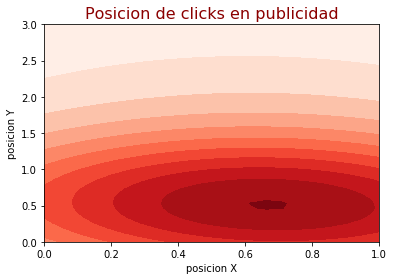

In [100]:
# Grafico
f, ax = plt.subplots()

ax = sns.kdeplot(positions['touchX'], positions['touchY'], cmap="Reds", shade=True, bw=.60, shade_lowest=True)

ax.set_xlabel('posicion X')
ax.set_ylabel('posicion Y')
ax.set_title('Posicion de clicks en publicidad', fontdict={'color':'darkred','size': 16})

axispos = plt.axis([0,1,0,3])

### Tiempo que se tarda en clickear una publicidad

In [101]:
# Quitamos los valores invalidos
time = clicks['timeToClick'].dropna()

In [102]:
# Acotaremos nuestro analisis al primer minuto de aparicion de una publicidad.
time = time[time<=60]

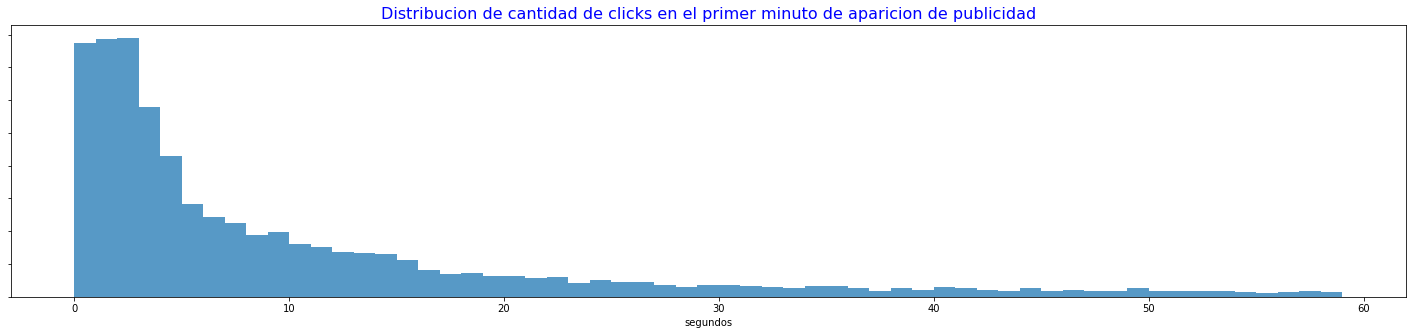

In [103]:
# Grafico
f, ax = plt.subplots(figsize=(25, 5))

plt.title('Distribucion de cantidad de clicks en el primer minuto de aparicion de publicidad', fontdict={'color':'b','size': 16})
plt.xlabel('segundos')
ax.set_yticklabels([])

ax= plt.hist(time, bins= range(60), alpha=0.75)

### Dia de la semana en la que se realizan mayor cantidad de click

In [104]:
# Función para convertir fecha a día de la semana.
def fecha_a_dia(fecha):
    return fecha.weekday()

# Se crean columnas con los dias de la semana.
clicks['weekday'] = clicks['created'].map(fecha_a_dia)

In [105]:
# Se cuenta la cantidad de clicks por dia de semana y se ordenan de manera convencional.
weekdays = clicks['weekday'].sort_index()

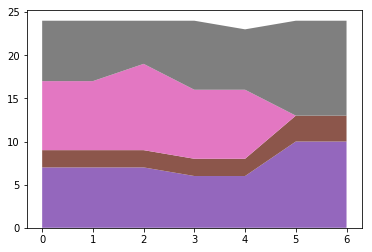

In [106]:
weekdays_labels = ['Domingo','Lunes','Martes','Miercoles','Jueves','Viernes','Sabado']

'''plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
ax.plot(clicks['weekday'].value_counts())

ax.set_xlabel('day of the week')
plt.xticks(labels = weekdays_labels)
ax.set_ylabel('clicks')'''
days = [0,1,2,3,4,5,6]

eating = [2,2,2,2,2,3,3]
sleeping= [7,7,7,6,6,10,10]
working= [8,8,10,8,8,0,0] 
playing = [7,7,5,8,7,11,11]

plt.plot([ ], [ ], label='sleeping')
plt.plot([ ], [ ], label='’eating’')
plt.plot([ ], [ ],  label='’working’')
plt.plot([ ], [ ], label='’playing’')

plt.stackplot(days, sleeping, eating, working, playing)